In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [4]:
access_token="1353583181727985664-b3pNLmo3eHlwlv86ZTGUJXyXewzrhi"

In [5]:
access_token_secret="ZBvLImlZokZ3yITW4u6oRbyygC7WIYGt8w2ErLnoi3Q81"

In [6]:
consumer_key="HHkKxjvVd14evrE0lMu168bND"

In [7]:
consumer_secret="b7woIZGkYQHlzDXfDDCPafOJXYF9tHeaKuvHuEsF6XNiUbye4w"

In [9]:
auth= tweepy.OAuthHandler(consumer_key,consumer_secret)

In [10]:
auth.set_access_token(access_token,access_token_secret)

In [12]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [13]:
def tweetSearch(query, limit = 100, language = "en", remove = []):
    #Create an empty text holder
    text = ""
    for tweet in tweepy.Cursor(api.search, q=query, lang=language).items(limit):
        text += tweet.text.lower()
    #Create a list of words to be removed
    removeWords = ["https","co"]
    removeWords += remove
    #Replace the words that you would like to removed with an empty space.
    for word in removeWords:
        text = text.replace(word, "")
        #returnclean text
        return text

In [14]:
search = tweetSearch("climatechange")
wordcloud = WordCloud().generate(search)

In [15]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    plt.show()
    search = tweetSearch("climatechange")

In [16]:
wordcloud = WordCloud(width = 2000, height = 1500, random_state=7, background_color='green', colormap='Pastel1', collocations=False , stopwords = STOPWORDS).generate(search)

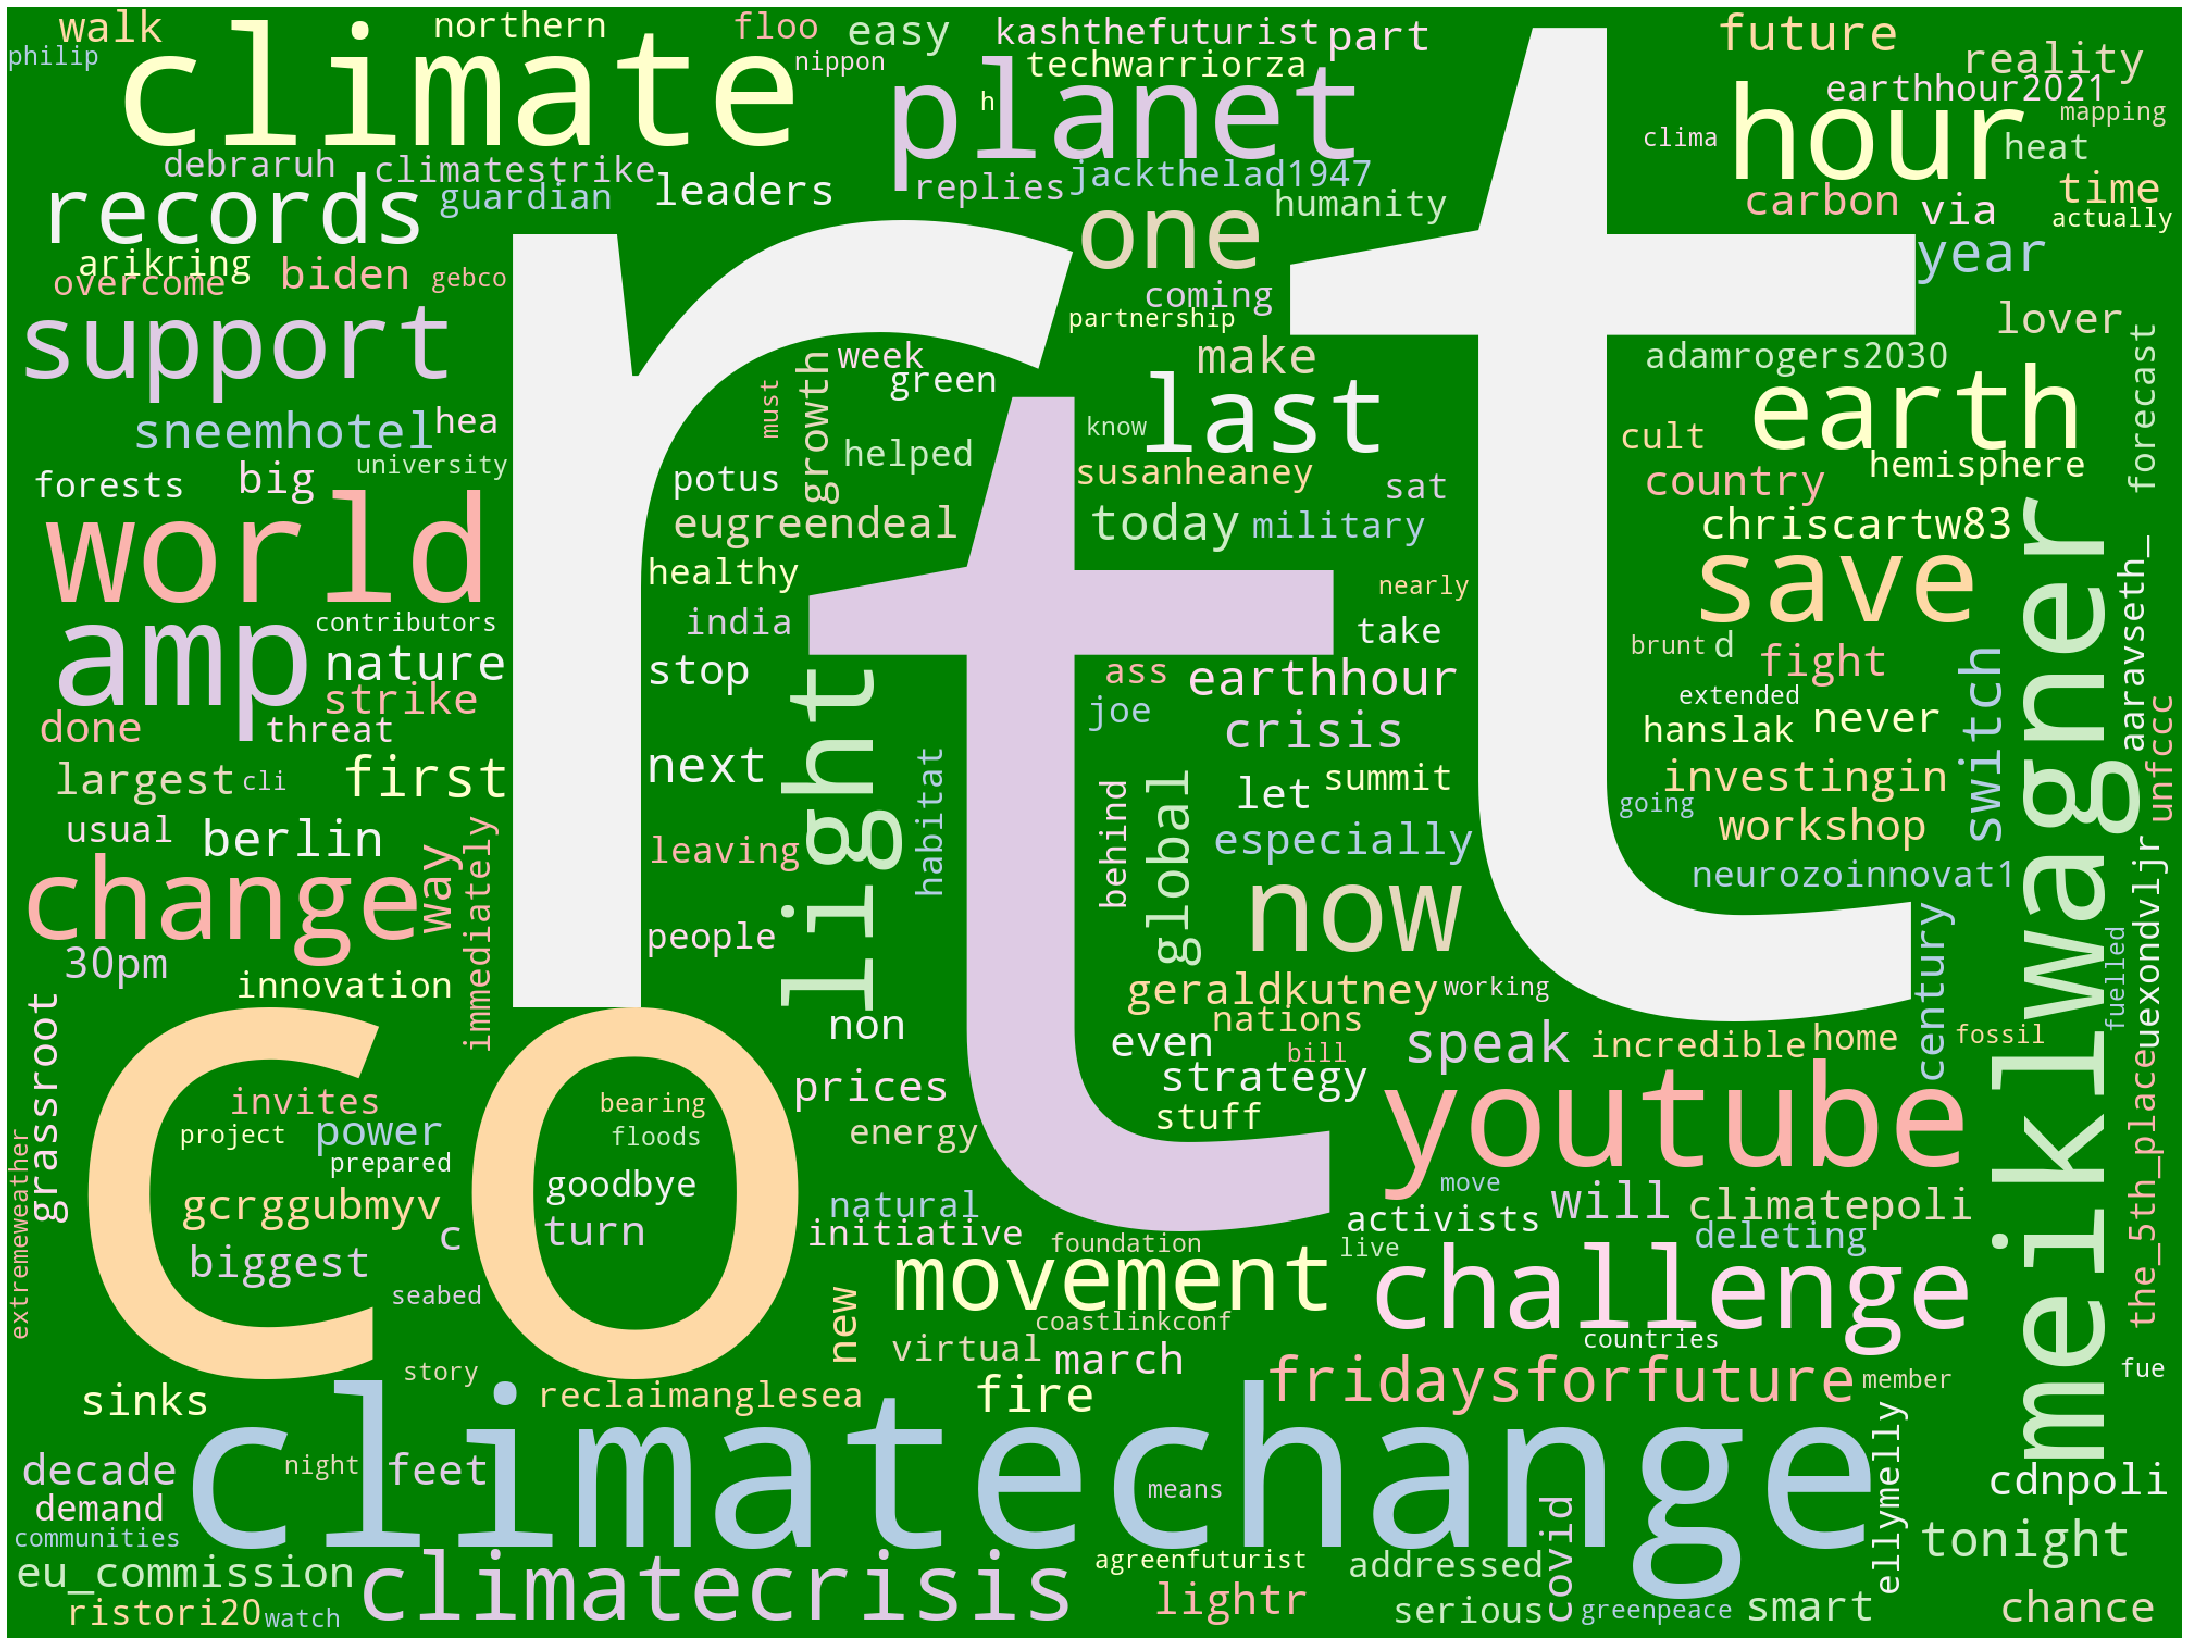

In [17]:
plot_cloud(wordcloud)

In [18]:
# Save image
wordcloud.to_file("first.png")

In [19]:
# Generate wordcloud
wordcloud = WordCloud(width = 2000, height = 1500, random_state=1, background_color='red', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(search)

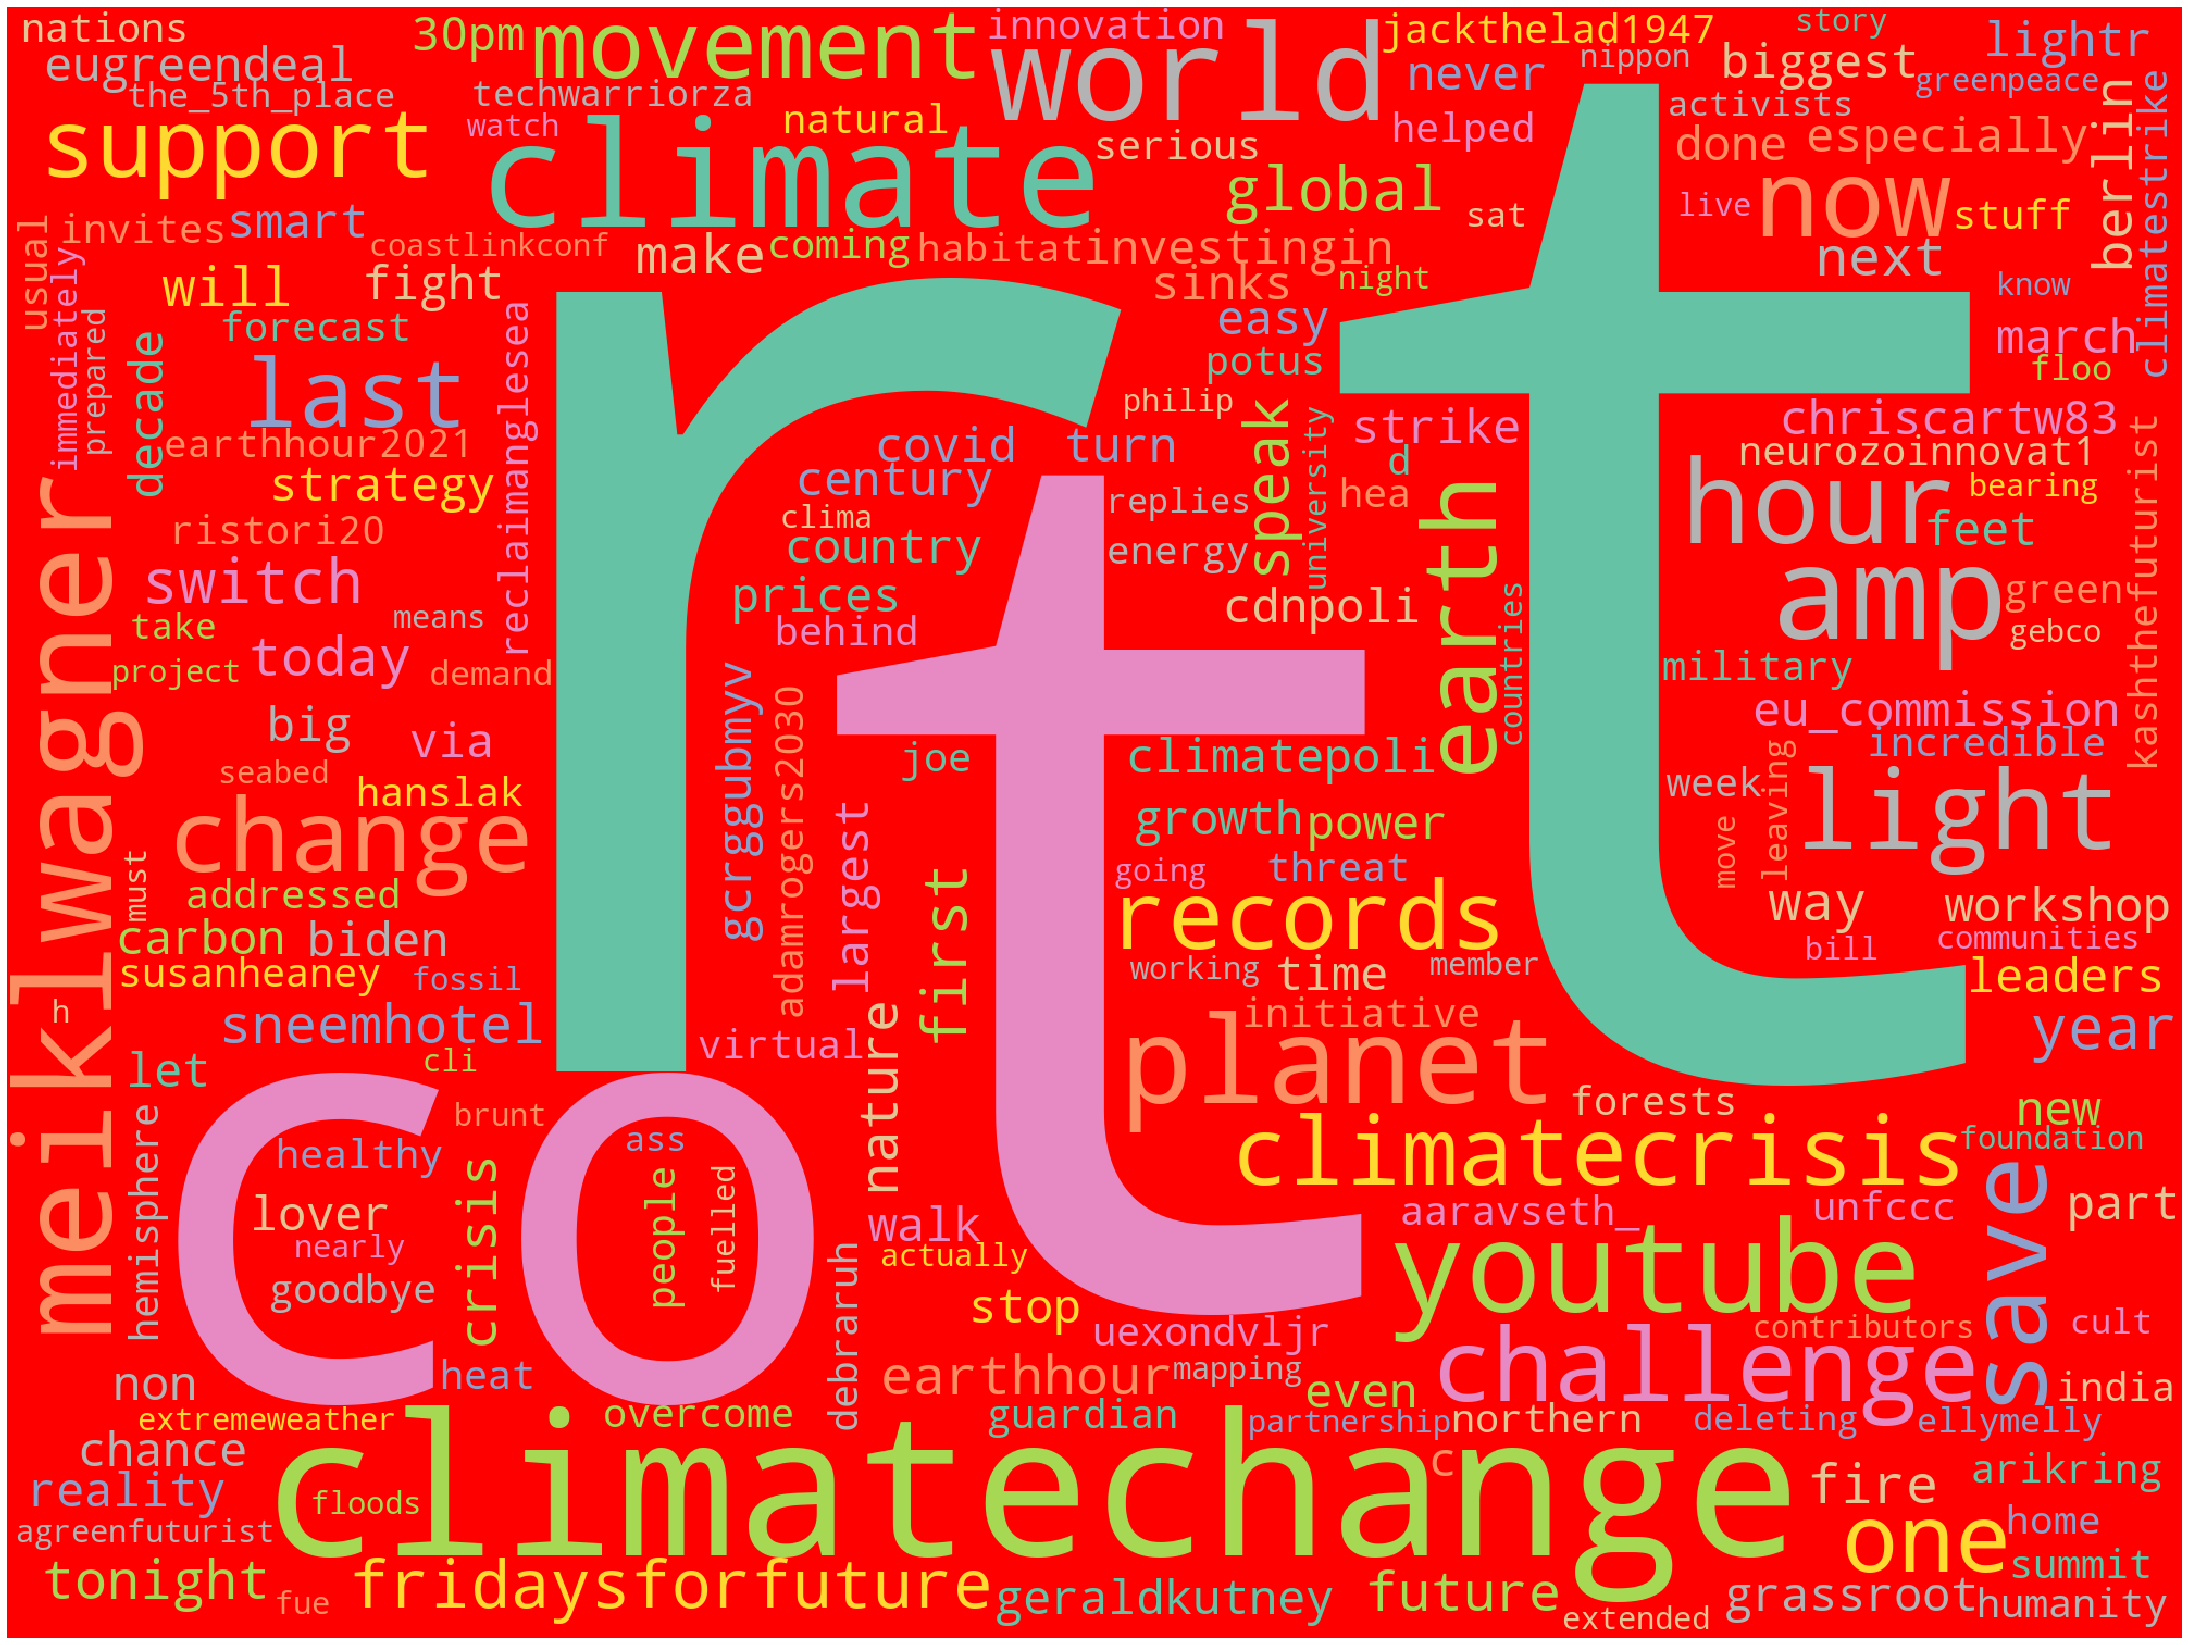

In [20]:
plot_cloud(wordcloud)

In [21]:
# Save image
wordcloud.to_file("Second.png")

In [22]:
import numpy as np
from PIL import Image

In [33]:
mask = np.array(Image.open('USER.png'))

In [34]:
wordcloud = WordCloud(width = 2000, height = 1500, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(search)

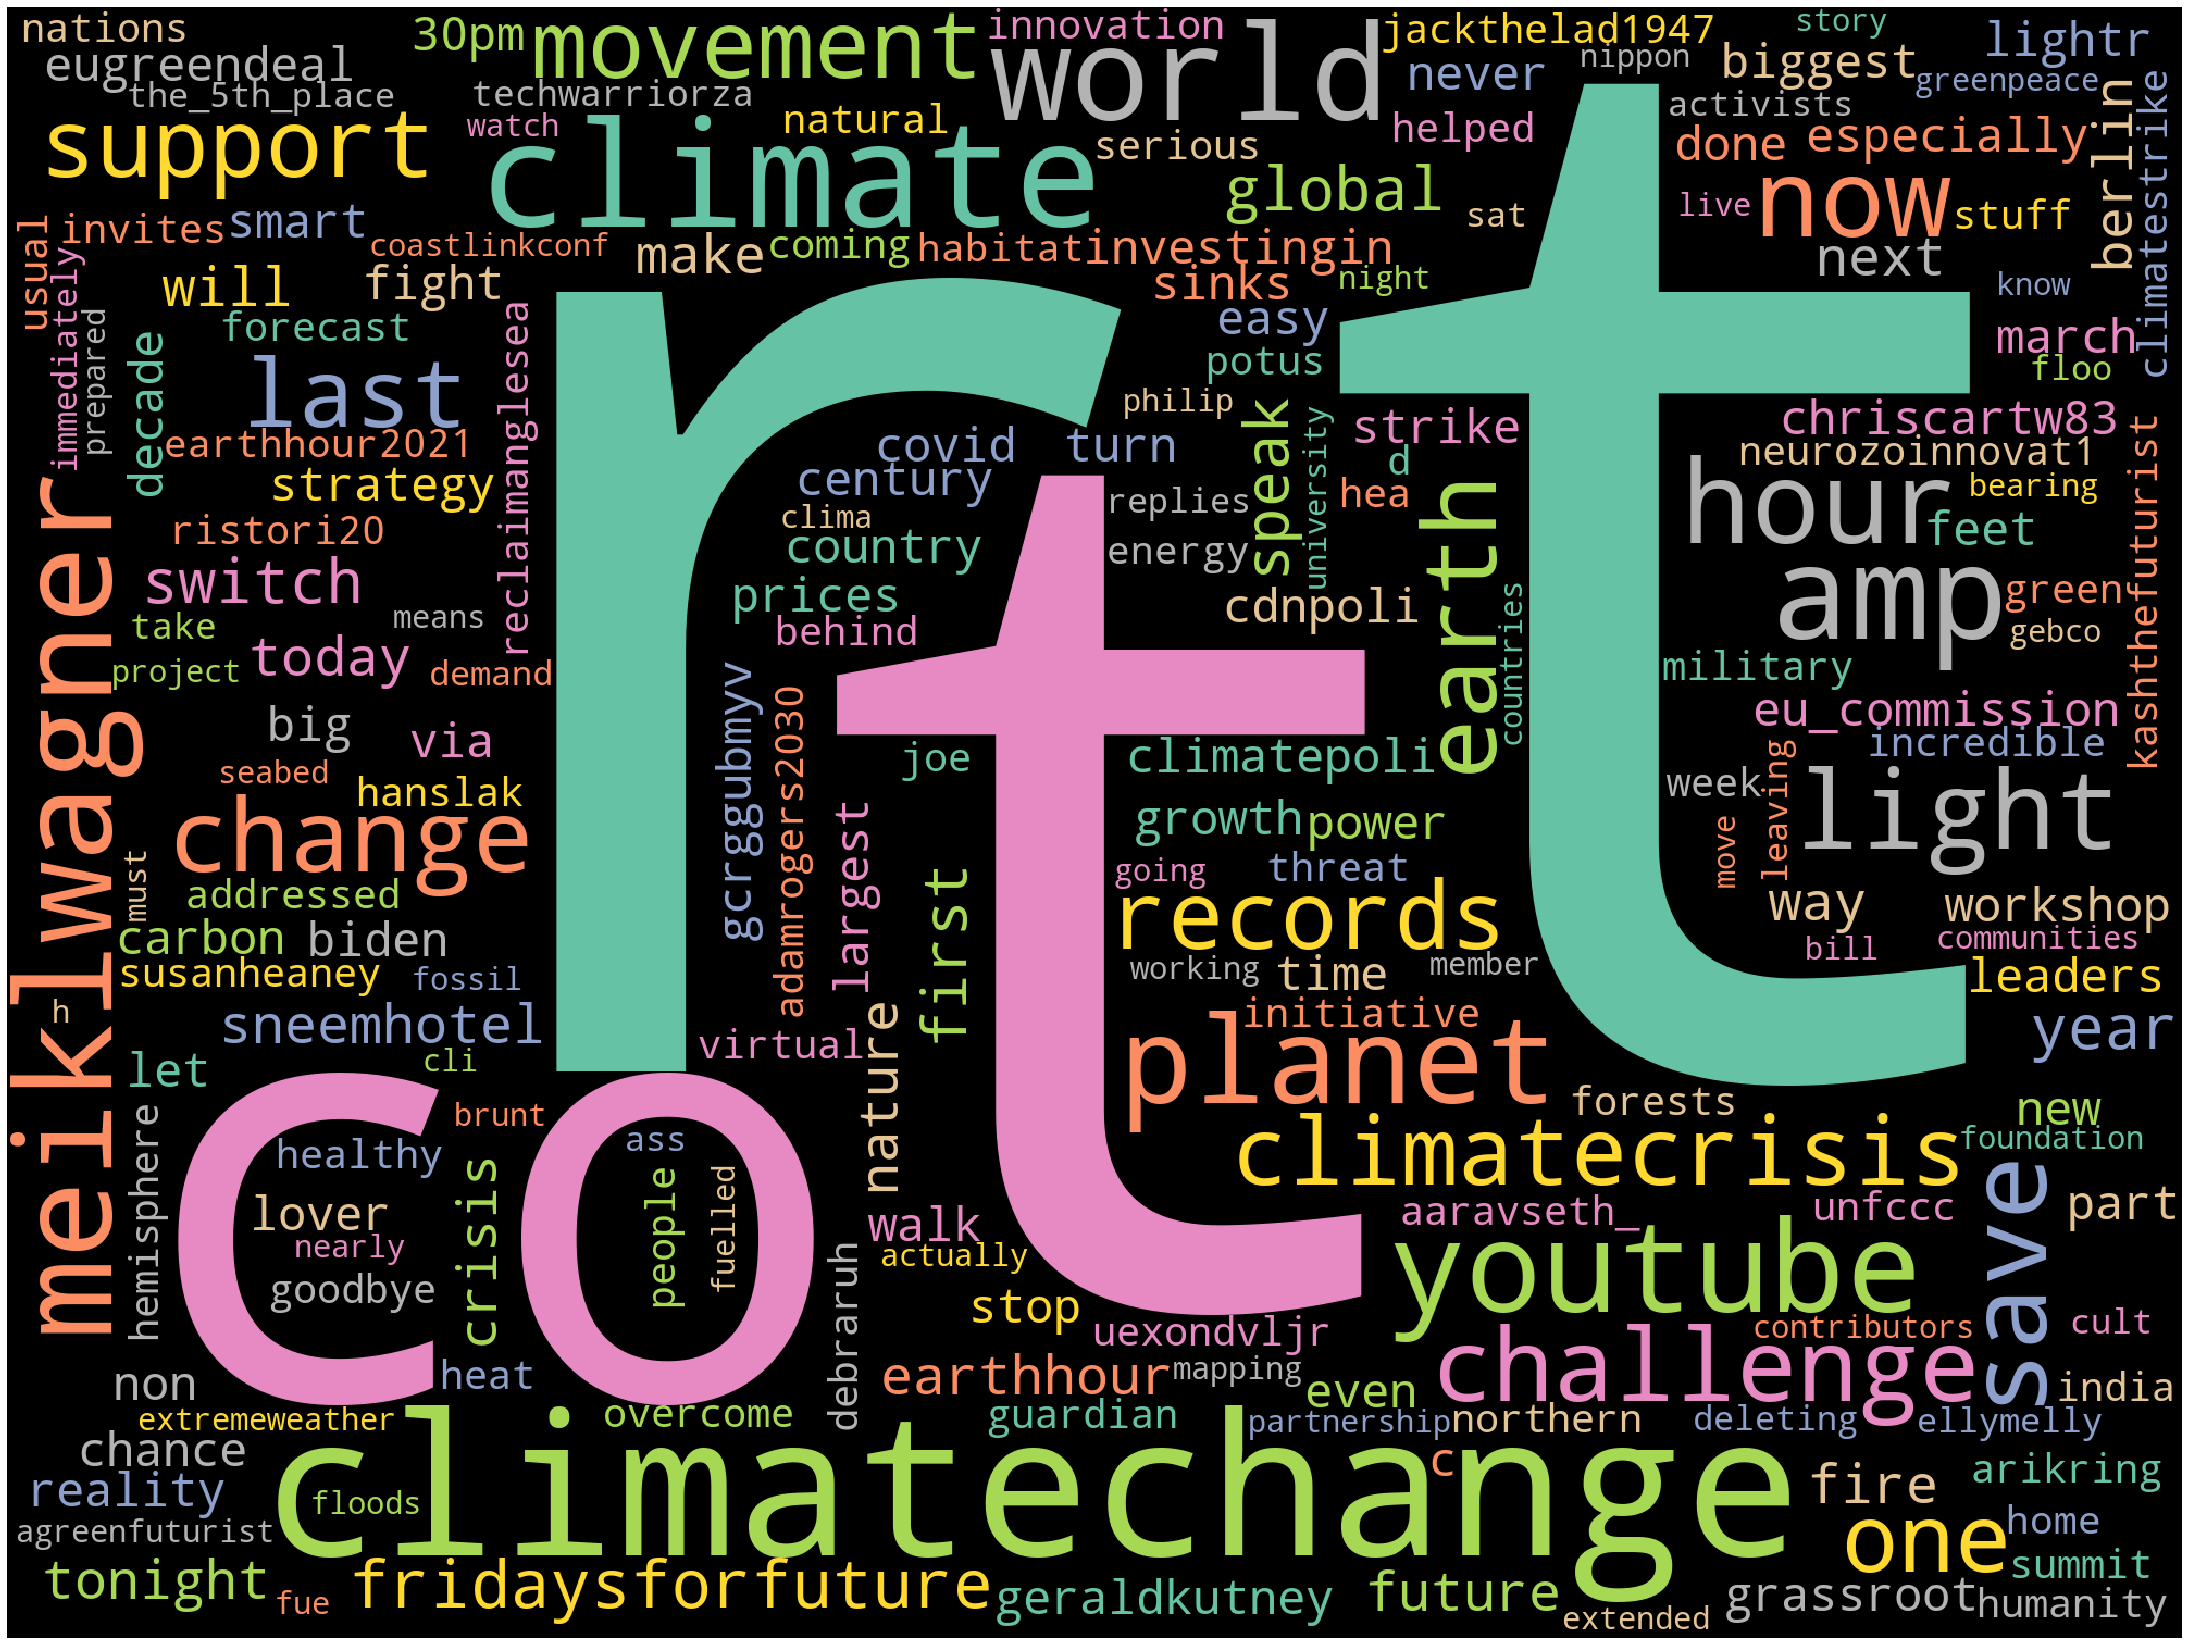

In [35]:
plot_cloud(wordcloud)